# 인공지능과 가위바위보 하기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

### 이미지 사이지를 변경하기 위해 라이브러리를 불러옴

In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 트레이닝 이미지 사이즈 변경

In [3]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [4]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [5]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 가위바위보의 경우 3개의 클래스로 라벨링  가위:0 바위:1 보:2

In [6]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


### 이미지 불러오기

라벨:  0


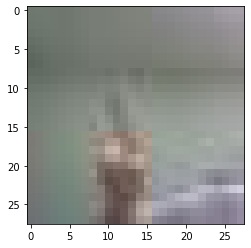

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 네트워크 설계를 해볼까요??

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

### 채널수 정보 입력 3(컬러)

In [9]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


### 네트워크 학습시켜보기

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=30)

Epoch 1/30
10/10 [==============================] - 3s 12ms/step - loss: 1.1131 - accuracy: 0.3167
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3300
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0945 - accuracy: 0.3667
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0930 - accuracy: 0.3333
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.4767
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.5067
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0870 - accuracy: 0.3633
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0691 - accuracy: 0.5900
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0648 - accuracy: 0.3933
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 1.0493 - accuracy: 0.7000
Epoch 11/30
10/10 

### 테스트 이미지 사이즈 변경해보기

In [11]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor1"
resize_images(image_dir_path)

print("가위1 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위1 이미지 resize 완료!


In [12]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock1"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [13]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper1"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [14]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper1/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 이미지 불러오기

라벨:  0


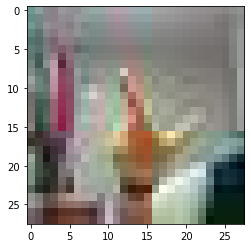

In [15]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

### 채널수 정보 입력 3(컬러)

In [16]:

print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))


x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)


print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


## 얼마나 잘 만들었는지 확인하기

### 테스트용 데이터로 확인해보기

In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.2441 - accuracy: 0.9233
test_loss: 0.24411864578723907 
test_accuracy: 0.9233333468437195


### 확률값을 추론하는 함수

In [18]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.614395   0.00622716 0.37937778]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


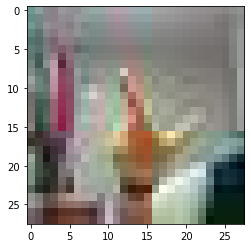

In [19]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

### 추론해낸 숫자와 실제 값이 다른 경우를 확인

예측확률분포: [0.3288543  0.30035877 0.37078694]
라벨: 0, 예측결과: 2


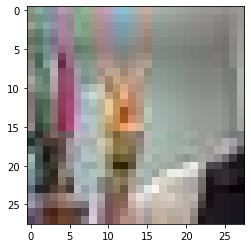

예측확률분포: [0.05118857 0.4397974  0.50901407]
라벨: 0, 예측결과: 2


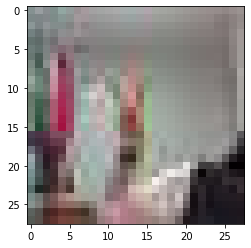

예측확률분포: [0.01734746 0.66324943 0.3194031 ]
라벨: 2, 예측결과: 1


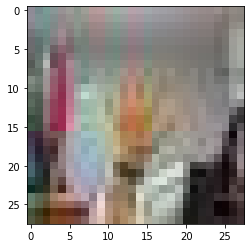

예측확률분포: [0.01022009 0.446804   0.54297596]
라벨: 1, 예측결과: 2


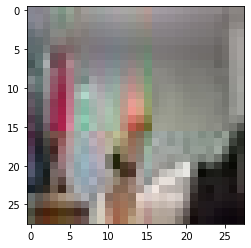

예측확률분포: [0.3365835  0.25371855 0.40969795]
라벨: 0, 예측결과: 2


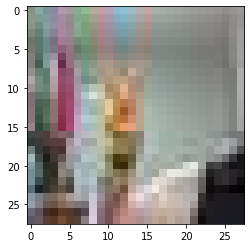

In [20]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 회고

## 어려웠던 점

### 프로젝트를 처음 경험해보기도 하고, 코드를 직접 짠 것은 아니지만 이해하고 넘어가는 것에 어려움이 있었습니다. 

## 알아내거나 모호한 점

### 이미지 데이터의 정확성이 중요하다고 생각했습니다. 왜냐하면 처음 이미지를 학습시키고 테스트 이미지와 함께 코드를 실행시켰을 때 정확도가 30조차 나오지 않았는데 학습시키는 이미지 데이터를 다양하고 여러가지 동작으로 바꾸고 테스트를 해보니 정확도가 확실히 오른 것을 볼 수 있었습니다. 모호한 점은 이런 프로젝트들이 과연 정확도가 100이 나올 수 있을까?라는 생각을 갖게 되었습니다.

## 평가 지표를 맞추기 위해 시도한 것

### 처음 정확도가 너무 낮아서 '처음부터 다시 생각해보자.'라는 마음으로 이미지 데이터를 준비하는 teachablemachine의 모델 학습시키기 과정에서 가위, 바위, 보 각 각의 데이터들을 100%에 가깝게  최대한 맞추고, 다른 분들의 가위, 바위, 보를 내는 다양한 모습을 생각하며 이미지 다시 촬영하고 최대한 많은 사람들의 손의 모습을 담을 수 있도록 해보았습니다.

## 자기다짐

### 언제까지 짜여져 있는 코드만 볼 수는 없다. 코드에 대한 이해력을 높이자!!